In [1]:
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd

df = pd.read_csv('Concrete_Data.csv')

# rename columns
df.rename(columns=lambda x: x.split('(')[0].strip(), inplace=True)

In [2]:
df.assign().head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.describe(percentiles=[])

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
# Show columns containing missing values
print("Columns containing missing value:", 
      df.columns[df.isna().any()].tolist())

Columns containing missing value: []


### Standardization 

In [5]:
from sklearn.preprocessing import StandardScaler

np_scaled = StandardScaler().fit_transform(df)
df = pd.DataFrame(np_scaled, columns=df.columns)
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,2.645408
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,1.561421
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,0.266627
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,0.313340
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487,0.507979


### Visualization

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

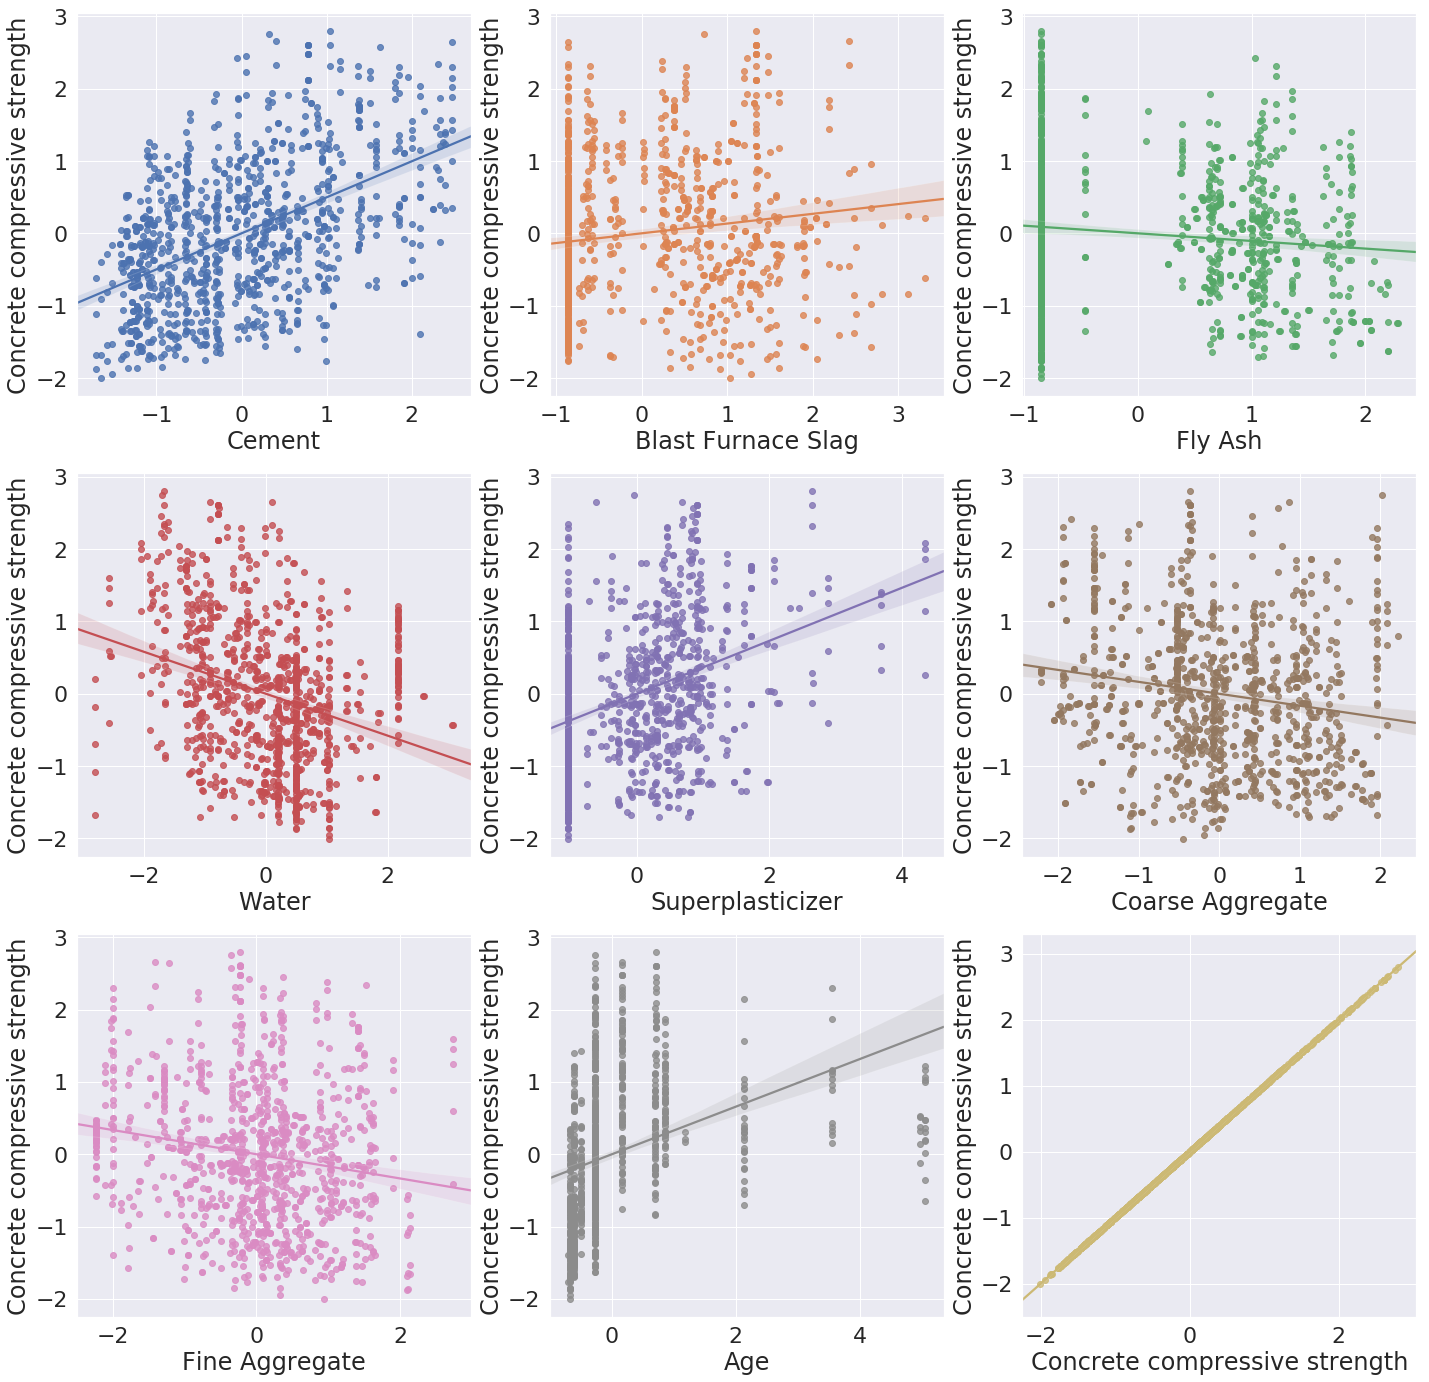

In [7]:
# Create a figure instance, and the two subplots
inputNum = 8

sns.set(font_scale=2)
fig, axes = plt.subplots(3, 3, figsize=(24, 24))


for i in range(0, 3):
    for j in range(0, 3):
        sns.regplot(x=df.columns[i*3+j], y=df.columns[inputNum], data=df, ax=axes[i][j])

#plt.show()

## Data Partition
* For each input attribute
    * 80% data for training
    * 20% data for testing

In [8]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

row = ['lm1', 'lm2', 'lm3', 'lm4', 'lm5', 'lm6', 'lm7', 'lm8']
col = ['MSE', 'R2', 'bias', 'weight']
regResult = pd.DataFrame(index=row, columns=col)

inputNum = 8

X, y = df.iloc[:, 0:inputNum], df.iloc[:, inputNum:inputNum+1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Simple Linear Regression
* iteratively train linear model with each attribute

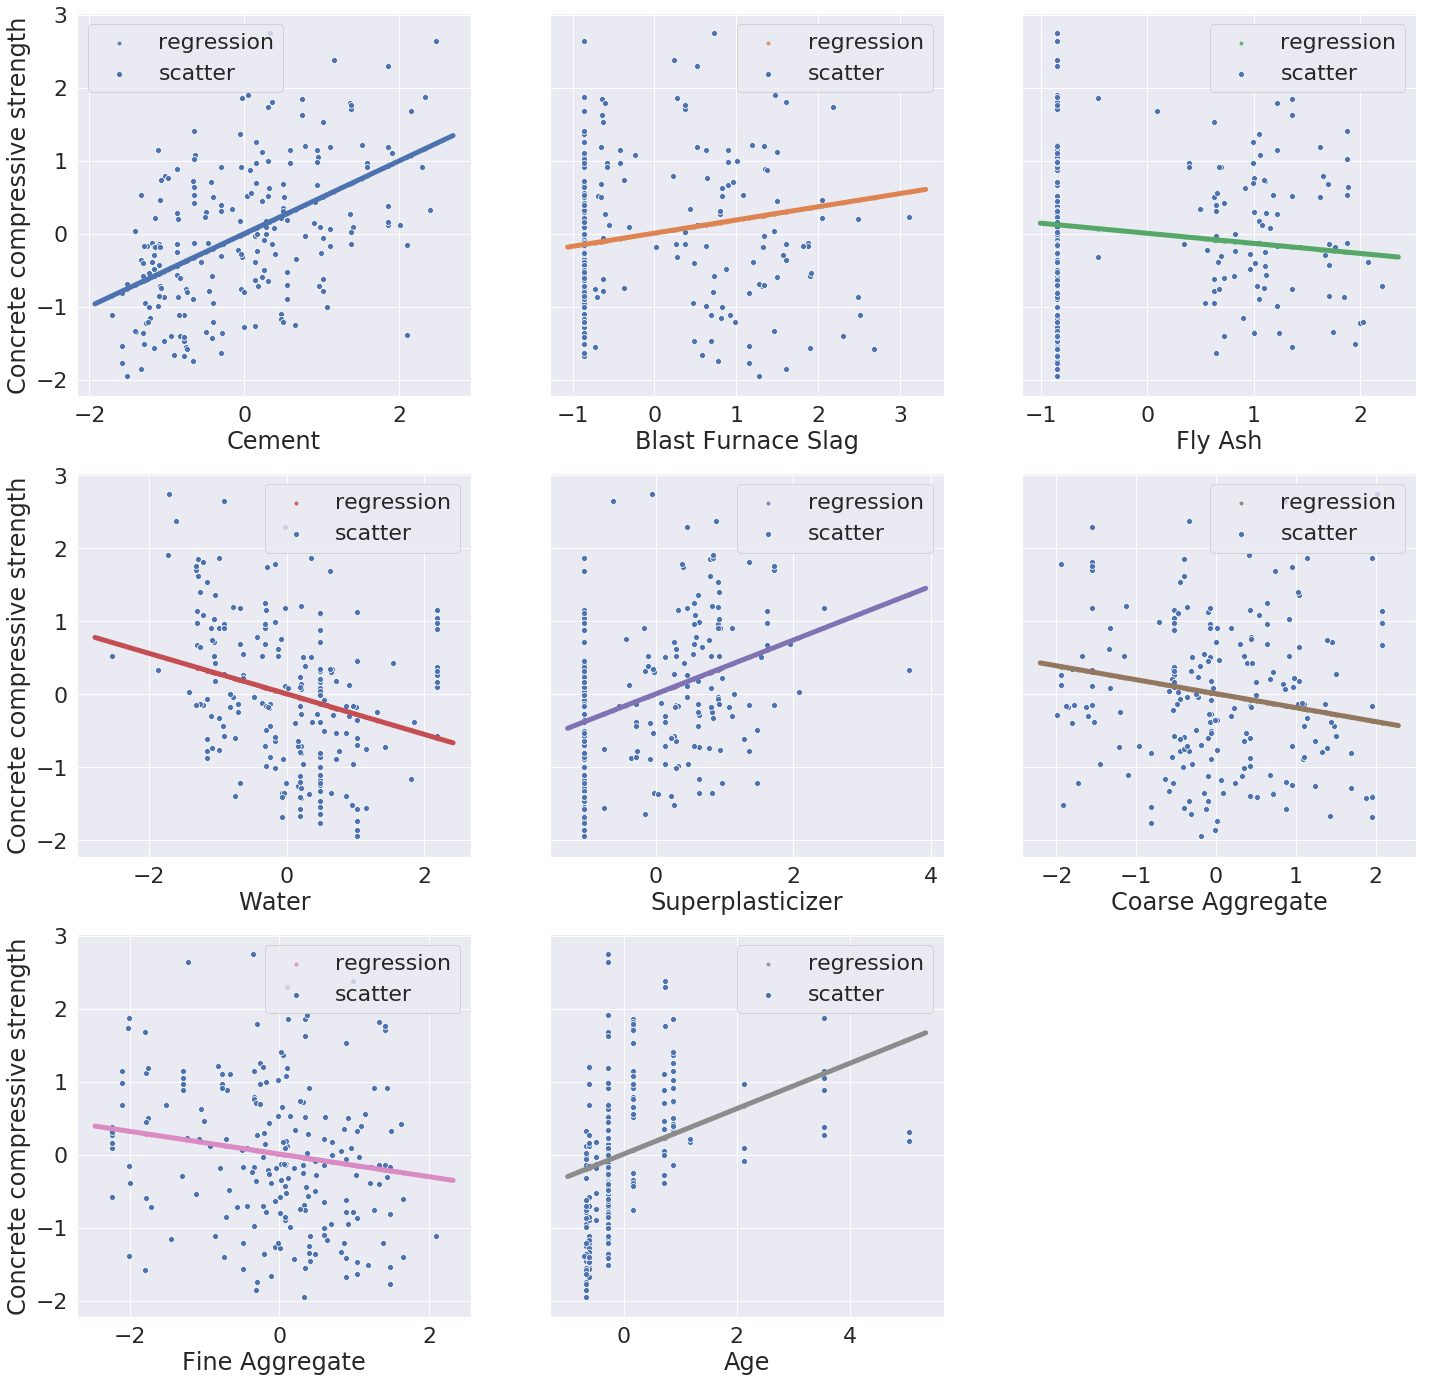

In [9]:
from sklearn.linear_model import LinearRegression

fig, axes = plt.subplots(3, 3, figsize=(24, 24), sharey=True)
axes[2][2].set_visible(False)

# Put train/test data to DataFrame to draw plot
Train = pd.concat([X_train, y_train], axis=1)
Test = pd.concat([X_test, y_test], axis=1)
    
for i in range(0, inputNum):

    """ simple linear regression by sklearn function"""

    # Train linear model by training set
    reg1 = LinearRegression().fit(X_train.iloc[:, i:i+1], y_train)
    
    # Prediction
    y_pred_lm = reg1.predict(X_test.iloc[:, i:i+1])
    Test['y_pred_lm'] = y_pred_lm

    # Plot outputs    
    plotRow = i//3
    plotCol = i%3
    
    sns.set(font_scale=2)
    sns.regplot(x=Test.columns[i], y='y_pred_lm', 
                data=Test, label='regression', 
                marker='.', line_kws={"linewidth": 5 },
                ax=axes[plotRow][plotCol])
    
    sns.set(font_scale=2)
    sns.scatterplot(x=Test.columns[i], y='Concrete compressive strength', 
                    data=Test, label='scatter', 
                    ax=axes[plotRow][plotCol])

    
    # Record metrics
    regResult.iloc[i, 0] = mean_squared_error(y_test, y_pred_lm)
    regResult.iloc[i, 1] = r2_score(y_test, y_pred_lm)
    regResult.iloc[i, 2] = reg1.intercept_[0]
    regResult.iloc[i, 3] = reg1.coef_[0]
   

In [10]:
regResult

,MSE,R2,bias,weight
lm1,0.735476,0.250549,0.00406217,[0.49910589546492895]
lm2,1.03136,-0.0509538,0.0100785,[0.18087601452882726]
lm3,1.00824,-0.0274009,0.00834678,[-0.1380311428528109]
lm4,0.884516,0.0986766,0.00657784,[-0.277783902906229]
lm5,0.872039,0.111391,0.00625077,[0.3687263725583644]
lm6,0.997599,-0.0165544,0.00936766,[-0.19126888146426743]
lm7,0.942229,0.039867,0.0109466,[-0.15542064968020433]
lm8,0.834198,0.149951,0.0120315,[0.3101683558680751]


In [11]:
max(regResult['R2'])

0.2505490553185785

### Result
* The first attribute "Cement" is most relative to target